In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
import seaborn as sns

In [2]:
bq = bigquery.Client()

In [3]:
%%bigquery df
SELECT 
    * 
FROM 
    data_chile.v_asistencia 

Downloading: 100%|██████████| 10776175/10776175 [00:11<00:00, 910024.05rows/s] 


In [4]:
df.head()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,...,GEN_ALU,GEN_ALU_GLOSA,FEC_NAC_ALU,COD_COM_ALU,NOM_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO,LAT_COMUNA,LONG_COMUNA
0,2019,12,4898,4,ESCUELA MANUEL AMAT Y JUNIET,8,BIO-BIO,81,8105,HUALQUI,...,1,EDUCACION PARVULARIA,201409,8105,HUALQUI,4,4,100.000000,"-36°58'12""","-72°55'588"""
1,2019,11,4960,3,COLEGIO ANGEL DE PEREDO,8,BIO-BIO,81,8106,LOTA,...,2,ENSEÑANZA BASICA NIÑOS,200904,8102,CORONEL,8,12,66.666667,"-37°5'204""","-73°9'18"""
2,2019,11,4575,6,ESCUELA BASICA JOHN F. KENNEDY,8,BIO-BIO,81,8103,CHIGUAYANTE,...,1,EDUCACION PARVULARIA,200602,3202,DIEGO DE ALMAGRO,11,16,68.750000,"-36°54'324""","-73°1'408"""
3,2019,12,4958,1,ESCUELA BASICA THOMPSON MATTHEWS,8,BIO-BIO,81,8106,LOTA,...,2,ENSEÑANZA BASICA NIÑOS,201210,8106,LOTA,3,4,75.000000,"-37°5'204""","-73°9'18"""
4,2019,10,4953,0,ESCUELA ISIDORA GOYENECHEA,8,BIO-BIO,81,8106,LOTA,...,1,EDUCACION PARVULARIA,200606,5101,VALPARAÍSO,14,17,82.352941,"-37°5'204""","-73°9'18"""


In [5]:
type(df)
df.describe()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,RURAL_RBD,COD_DEPE,COD_ENSE,COD_ENSE2,COD_GRADO,MRUN,GEN_ALU,COD_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO
count,10776175.0,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07
mean,2019.0,1.099839e+01,1.204064e+04,4.471738e+00,9.403722e+00,9.599156e+01,9.605555e+03,9.443034e+01,8.366568e-02,2.572117e+00,1.814414e+02,3.068302e+00,4.887941e+00,1.335109e+07,1.483032e+00,9.625744e+03,1.035633e+01,1.398597e+01,7.018684e+01
std,0.0,8.169360e-01,9.166389e+03,2.892726e+00,4.003259e+00,3.982240e+01,3.984832e+03,3.928571e+01,2.768858e-01,8.874795e-01,1.400266e+02,1.811350e+00,5.066223e+00,7.693141e+06,4.997142e-01,3.998503e+03,7.002502e+00,6.360809e+00,3.729455e+01
min,2019.0,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,0.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.0,1.000000e+01,4.664000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.107000e+03,6.100000e+01,0.000000e+00,2.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,6.683933e+06,1.000000e+00,6.108000e+03,4.000000e+00,9.000000e+00,5.555556e+01
50%,2019.0,1.100000e+01,1.006400e+04,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,0.000000e+00,3.000000e+00,1.100000e+02,2.000000e+00,4.000000e+00,1.336274e+07,1.000000e+00,1.010100e+04,1.300000e+01,1.700000e+01,8.750000e+01
75%,2019.0,1.200000e+01,1.775100e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,0.000000e+00,3.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,2.004915e+07,2.000000e+00,1.312400e+04,1.600000e+01,1.900000e+01,1.000000e+02
max,2019.0,1.200000e+01,4.141800e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,1.000000e+00,6.000000e+00,9.100000e+02,8.000000e+00,3.400000e+01,2.606861e+07,2.000000e+00,1.630500e+04,2.500000e+01,2.500000e+01,1.000000e+02


<AxesSubplot:>

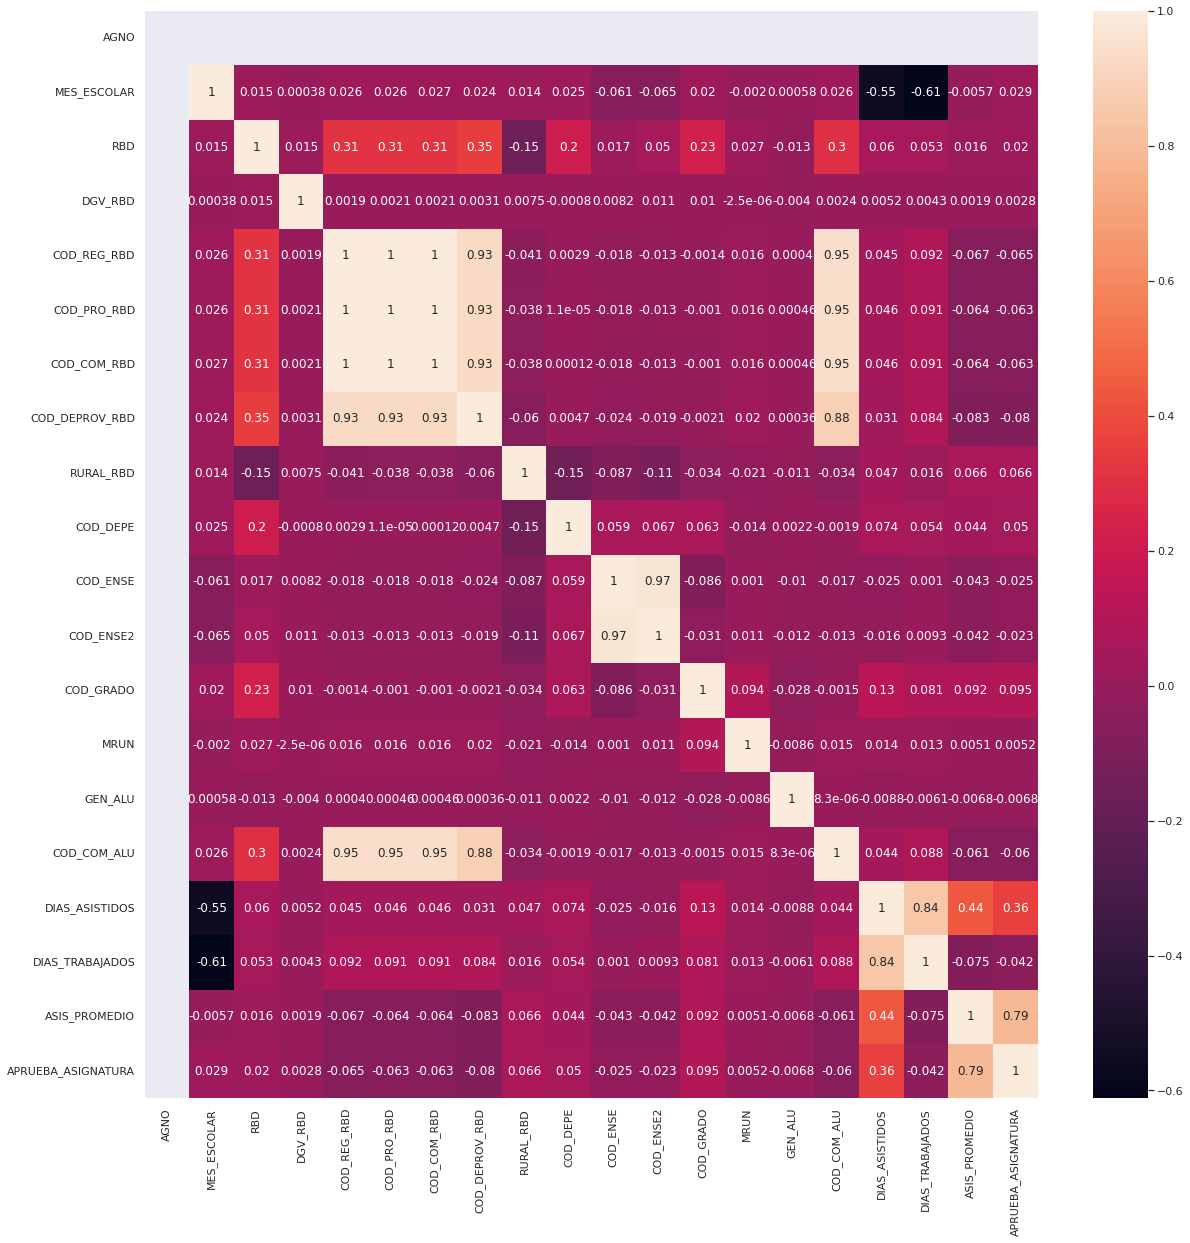

In [22]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df.corr(), annot=True)

In [7]:
#Ninguna columna es nula
df.isnull().sum()

AGNO               0
MES_ESCOLAR        0
RBD                0
DGV_RBD            0
NOM_RBD            0
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
RURAL_RBD          0
RURAL_RBD_GLOSA    0
COD_DEPE           0
COD_DEPE_GLOSA     0
COD_DEPE2          0
COD_DEPE2_GLOSA    0
COD_ENSE           0
COD_ENSE_GLOSA     0
COD_ENSE2          0
COD_ENSE2_GLOSA    0
COD_GRADO          0
COD_GRADO_GLOSA    0
LET_CUR            0
MRUN               0
GEN_ALU            0
GEN_ALU_GLOSA      0
FEC_NAC_ALU        0
COD_COM_ALU        0
NOM_COM_ALU        0
DIAS_ASISTIDOS     0
DIAS_TRABAJADOS    0
ASIS_PROMEDIO      0
LAT_COMUNA         0
LONG_COMUNA        0
dtype: int64

In [23]:
#Aqui se pueden aplicar filtros, por si fuera necesario
#df = df[df['ASIS_PROMEDIO'] > 0]

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 20)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-15, 130);

In [ ]:
df.hist(column='ASIS_PROMEDIO')

In [13]:
df['APRUEBA_ASIGNATURA'] = df['ASIS_PROMEDIO'] >=85

(-10.0, 110.0)

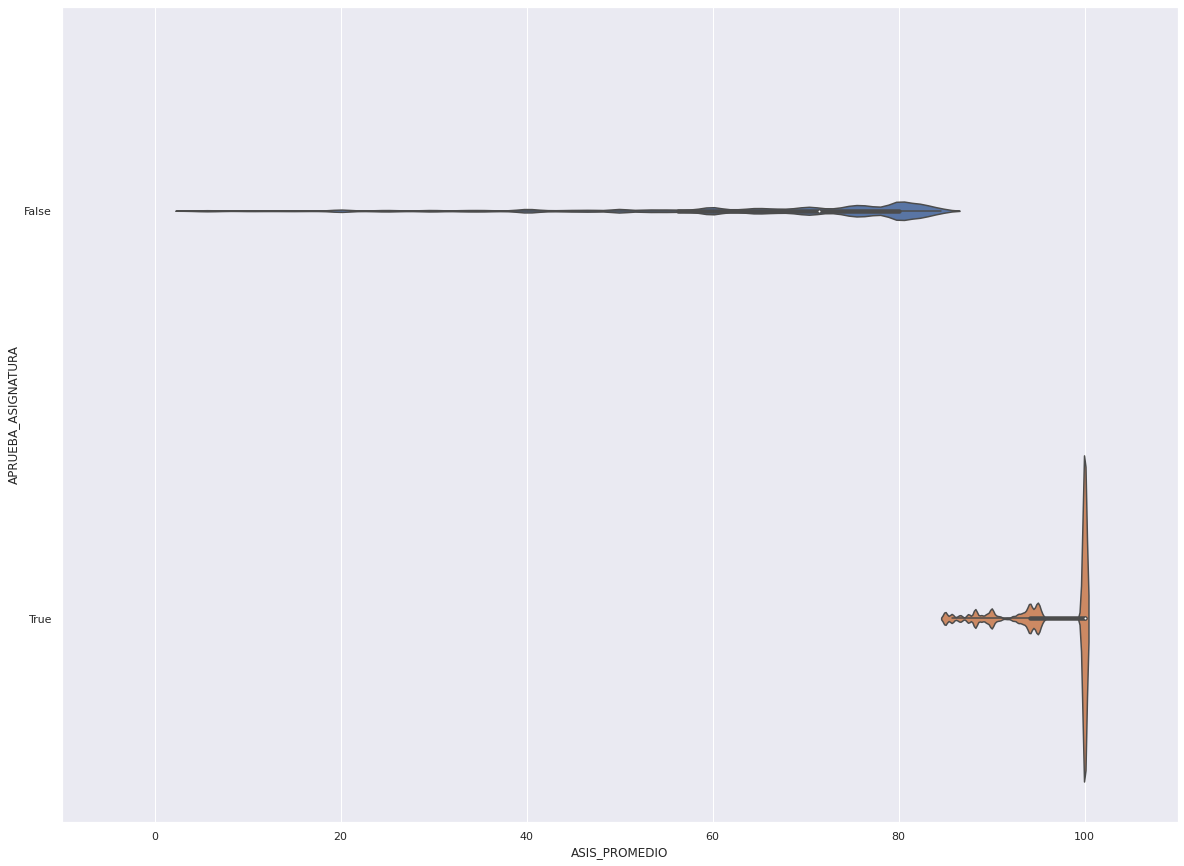

In [14]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', y='APRUEBA_ASIGNATURA', inner='box', orient='h')
ax.set_xlim(-10, 110)

In [15]:
def std(x): 
    return np.std(x)

In [16]:
df_aux = df.groupby('NOM_COM_RBD').agg(
    avg=pd.NamedAgg(column="ASIS_PROMEDIO", aggfunc="mean"),
    stddev=pd.NamedAgg(column="ASIS_PROMEDIO", aggfunc=std),
    count=pd.NamedAgg(column="ASIS_PROMEDIO", aggfunc="count")
).reset_index()

In [17]:
%%bigquery df_v_asistencia_comuna
SELECT 
  COMUNA,  
  PROMEDIO_ASISTENCIA,
  DESV_STD_ASISTENCIA,
  COUNT_ASISTENCIA
FROM 
  `infinite-lens-352300.data_chile.v_asistencia_comuna` 
ORDER BY
    COMUNA

Downloading: 100%|██████████| 345/345 [00:04<00:00, 78.02rows/s]


In [18]:
df_v_asistencia_comuna

,COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA
0,ALGARROBO,76.832264,32.972583,8624
1,ALHUÉ,70.128234,26.920358,3755
2,ALTO BIOBÍO,82.517442,31.593825,3994
3,ALTO DEL CARMEN,81.363808,29.292333,2795
4,ALTO HOSPICIO,52.101022,44.214583,100786
...,...,...,...,...
340,YUMBEL,82.932122,31.224903,12516
341,YUNGAY,83.045765,29.565545,11844
342,ZAPALLAR,81.143756,30.902464,5240
343,ÑIQUÉN,78.821192,28.984771,5144


<AxesSubplot:xlabel='COMUNA'>

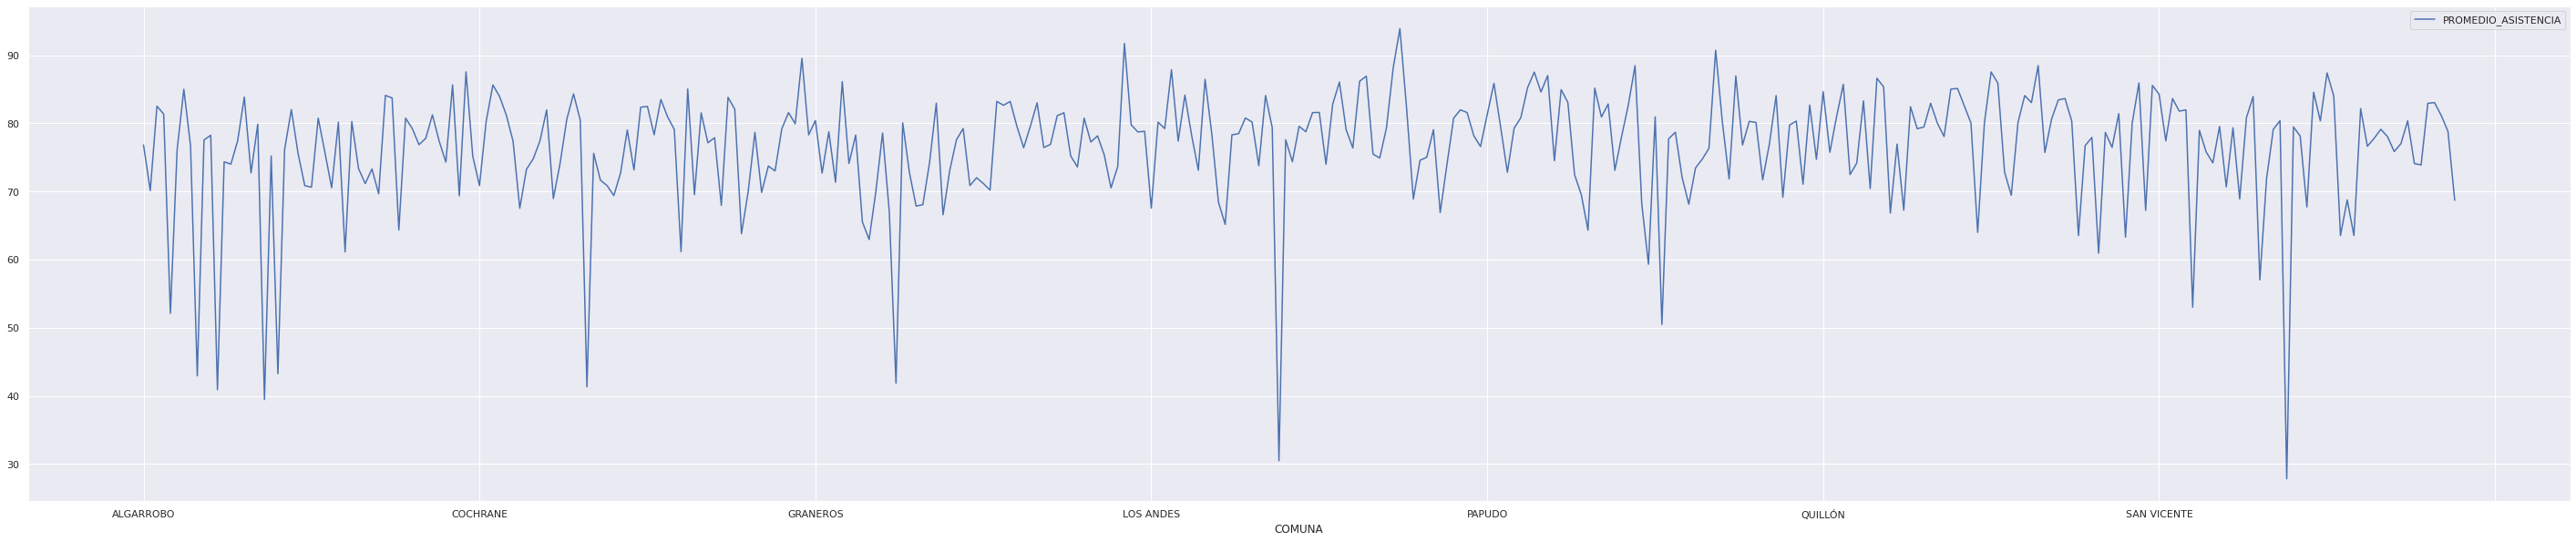

In [19]:
df_v_asistencia_comuna.plot(
    kind='line',
    x='COMUNA',
    y='PROMEDIO_ASISTENCIA',
    figsize=(50, 10)
)

In [20]:
df.groupby('NOM_COM_RBD').count()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,...,GEN_ALU_GLOSA,FEC_NAC_ALU,COD_COM_ALU,NOM_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO,LAT_COMUNA,LONG_COMUNA,APRUEBA_ASIGNATURA
NOM_COM_RBD,,,,,,,,,,,,,,,,,,,,,
ALGARROBO,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,...,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664
ALHUÉ,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487,...,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487
ALTO BIOBÍO,3554,3554,3554,3554,3554,3554,3554,3554,3554,3554,...,3554,3554,3554,3554,3554,3554,3554,3554,3554,3554
ALTO DEL CARMEN,2540,2540,2540,2540,2540,2540,2540,2540,2540,2540,...,2540,2540,2540,2540,2540,2540,2540,2540,2540,2540
ALTO HOSPICIO,61808,61808,61808,61808,61808,61808,61808,61808,61808,61808,...,61808,61808,61808,61808,61808,61808,61808,61808,61808,61808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUMBEL,11183,11183,11183,11183,11183,11183,11183,11183,11183,11183,...,11183,11183,11183,11183,11183,11183,11183,11183,11183,11183
YUNGAY,10726,10726,10726,10726,10726,10726,10726,10726,10726,10726,...,10726,10726,10726,10726,10726,10726,10726,10726,10726,10726
ZAPALLAR,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,...,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690
